# Decision Support System for Health Insurance

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Import Data

In [2]:
df = pd.read_csv(r'/content/insurance1.csv')
df.head()

,age,sex,weight,bmi,hereditary_diseases,children,smoker,city,bloodpressure,diabetes,regular_ex,job_title,charges
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


## Understand Data

In [3]:
df.shape

(15000, 13)

In [4]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
children                 int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
charges                float64
dtype: object

### Removing duplicates from data

In [5]:
# check the duplicate values in the dataframe
df.duplicated().sum()

1096

In [6]:
# Remove the duplicates from the dataset
df.drop_duplicates(inplace=True)

In [7]:
# check the shape of the dataset
df.shape

(13904, 13)

## Exploratory Data Analysis

### Statistical Distribution

In [8]:
df.describe()

,age,weight,bmi,children,smoker,bloodpressure,diabetes,regular_ex,charges
count,13543.000000,13904.000000,13003.000000,13904.000000,13904.000000,13904.000000,13904.000000,13904.000000,13904.000000
mean,39.556598,64.894347,30.273483,1.126438,0.200662,68.657652,0.771145,0.230725,13431.813744
std,14.011047,13.675070,6.125247,1.225661,0.400510,19.430514,0.420111,0.421312,12142.099413
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4883.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9567.000000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16657.700000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


The distinct value shows number of distinct values in a attribute Skewness provide the Mode of the attribute by comparing with Mean we can conclude if its right or left skewed and explains if the distribution is peak or flat related to normal sdistribution

In [9]:
obs = df.shape[0]
distincts = df.apply(lambda x: x.unique().shape[0]) #provides number of distinct values in the attribute
skewness = df.skew()
kurtosis = df.kurt()
Mean = df.mean()
#data_description = pd.concat([types,counts,uniques,nulls,distincts, missing_ration,skewness, kurtosis] , axis=1)
cols = ['distincts', 'skewness', 'kurtosis', 'Mean']
str = pd.concat([ distincts, skewness, kurtosis, Mean] , axis=1)

str.columns = cols
#dtypes = str.types.value_counts()
display(str.sort_values(by='skewness', ascending=False))

<ipython-input-9-5a20668bf494>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
<ipython-input-9-5a20668bf494>:4: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurt()
<ipython-input-9-5a20668bf494>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mean = df.mean()


,distincts,skewness,kurtosis,Mean
smoker,2,1.495002,0.235063,0.200662
charges,2054,1.489221,1.447701,13431.813744
regular_ex,2,1.278453,-0.365610,0.230725
children,6,0.931568,0.204577,1.126438
bmi,270,0.377468,-0.076433,30.273483
weight,58,0.286729,-0.862059,64.894347
age,48,0.006109,-1.248190,39.556598
diabetes,2,-1.291012,-0.333336,0.771145
bloodpressure,69,-1.969798,5.432258,68.657652
sex,2,NaN,NaN,NaN


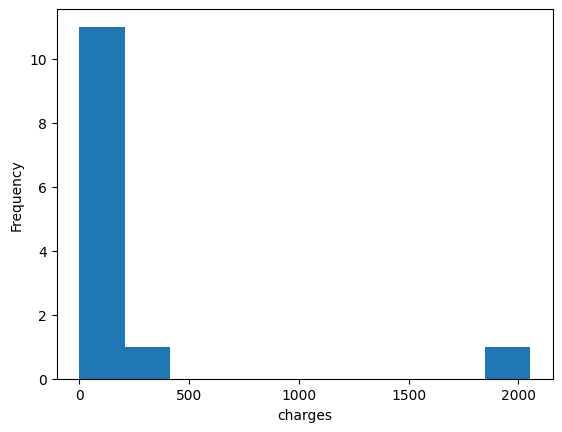

In [10]:
str['distincts'].plot(kind="hist")
plt.xlabel('charges')
plt.show()

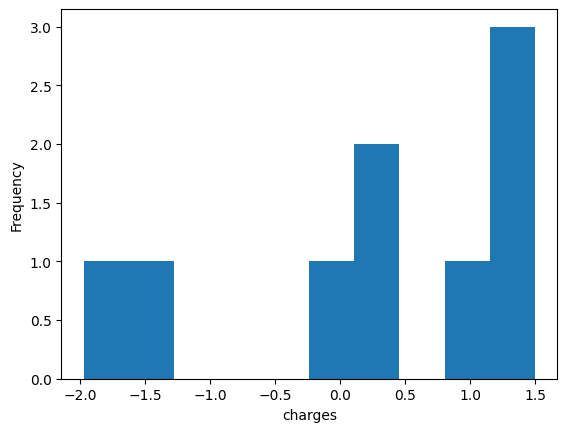

In [11]:
str['skewness'].plot(kind="hist")
plt.xlabel('charges')
plt.show()

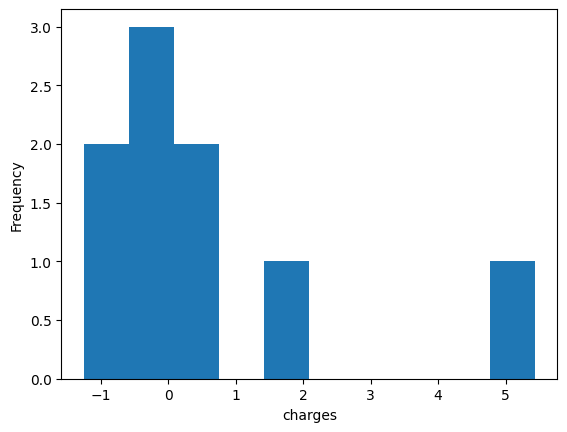

In [12]:
str['kurtosis'].plot(kind="hist")
plt.xlabel('charges')
plt.show()

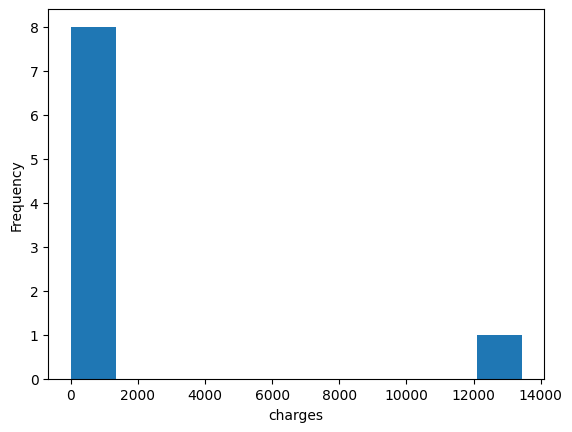

In [13]:
str['Mean'].plot(kind="hist")
plt.xlabel('charges')
plt.show()

### Categorical Data Analysis

In [14]:
Cat_df =df.select_dtypes(include='object')
print("The data set has following rows and columns",Cat_df.shape) # Displays number of rows and columns of category data set
print("The Categorical arrrtibutes are", Cat_df.columns) # Displays data set attributes

The data set has following rows and columns (13904, 4)
The Categorical arrrtibutes are Index(['sex', 'hereditary_diseases', 'city', 'job_title'], dtype='object')


#### Null Value analysis

In [15]:
catnullcheck = Cat_df.isnull().sum() #Provides number of null value in particular attribute
print(catnullcheck[catnullcheck > 0])

Series([], dtype: int64)


#### Data Quality Check - Null Percentage Check

In [16]:
Cat_null_mean_check = Cat_df.isnull().mean()
for feature, value in Cat_null_mean_check.items():
    if(value >0):
         print("The feature",feature, " has following percentage of Null Values",round((value*100),2))


### Numerical Data Analysis

In [17]:
num_df =df.select_dtypes(exclude='object')
print(num_df.columns) #Displays Numerical data attributes
print(num_df.shape)#Displays shape of Numerical data set

Index(['age', 'weight', 'bmi', 'children', 'smoker', 'bloodpressure',
       'diabetes', 'regular_ex', 'charges'],
      dtype='object')
(13904, 9)


#### Null Value Analysis

In [18]:
numnullcheck = num_df.isnull().sum()
print(numnullcheck[numnullcheck > 0])

age    361
bmi    901
dtype: int64


#### Data Quality Check - Null Percentage Check of Numerical Data

In [19]:
Num_null_mean_check = num_df.isnull().mean()
for feature, value in Num_null_mean_check.items():
    if(value >0):
         print("The feature",feature, " has following percentage of Null Values",round((value*100),2))


The feature age  has following percentage of Null Values 2.6
The feature bmi  has following percentage of Null Values 6.48


### Distribution of charges

<ipython-input-20-deef4314f6c1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Charges')

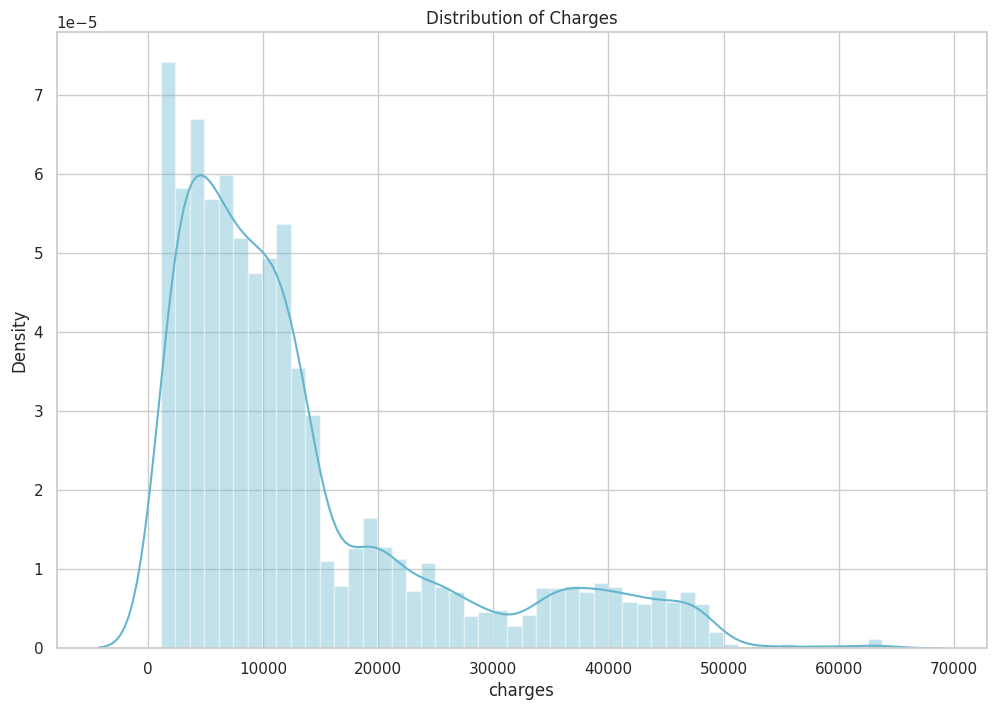

In [20]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

<ipython-input-21-d7e2ea77071f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )


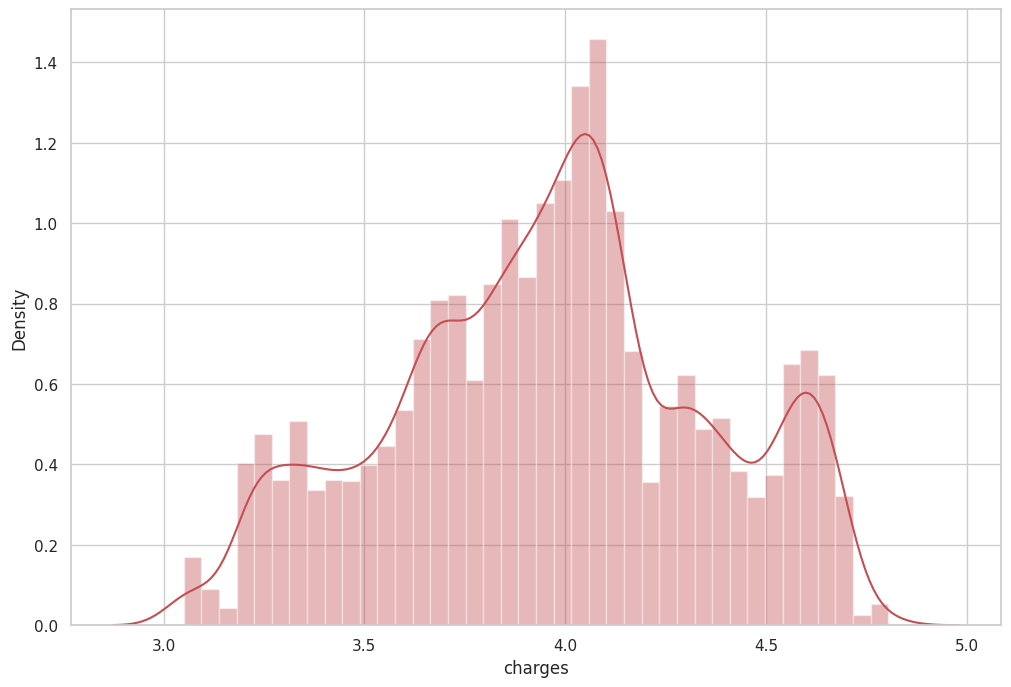

In [21]:
#applying natural log
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

<ipython-input-22-d64397edb458>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], hist=False)


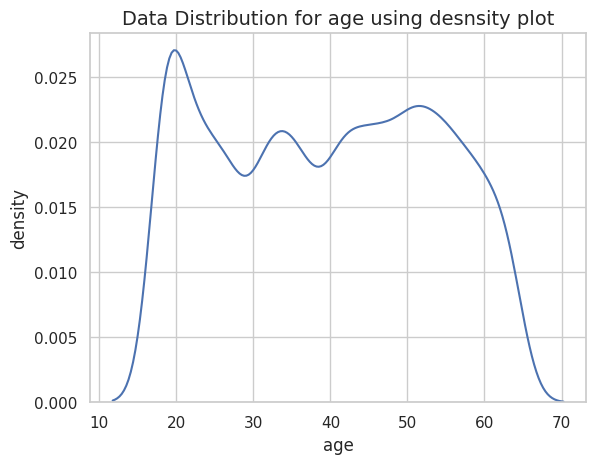

In [22]:
#  Density plot for age
sns.distplot(df['age'], hist=False)
plt.title("Data Distribution for age using desnsity plot", fontsize=14)
plt.xlabel("age")
plt.ylabel("density")
plt.show()

<ipython-input-23-0c8de2abeebd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"], hist=False)


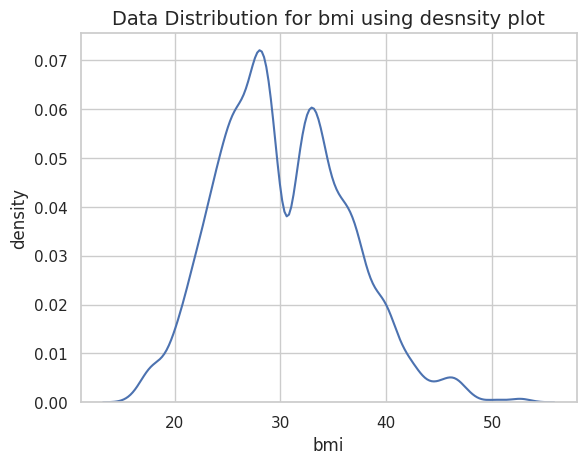

In [23]:
#  Density plot for bmi
sns.distplot(df["bmi"], hist=False)
plt.title("Data Distribution for bmi using desnsity plot", fontsize=14)
plt.xlabel("bmi")
plt.ylabel("density")
plt.show()

<ipython-input-24-a75b117dc9b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')


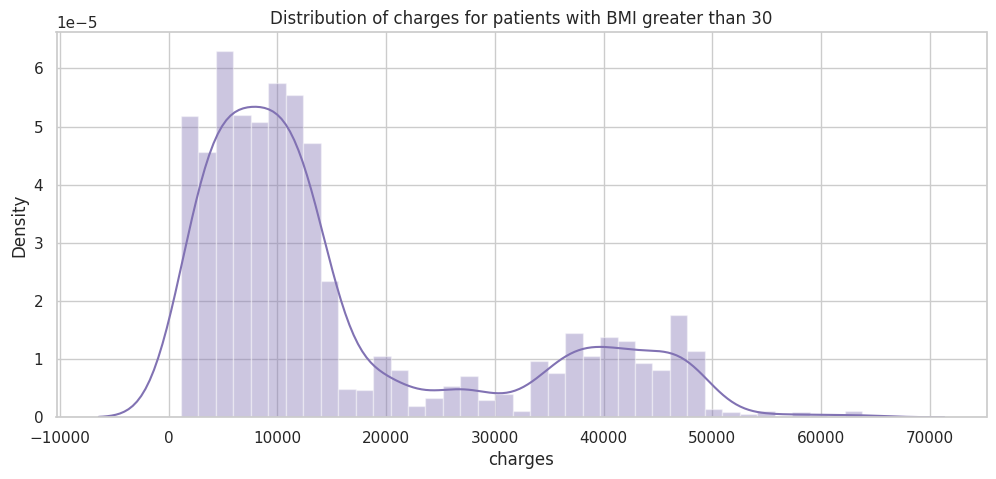

In [24]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

<ipython-input-25-f7fd4a420a90>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')


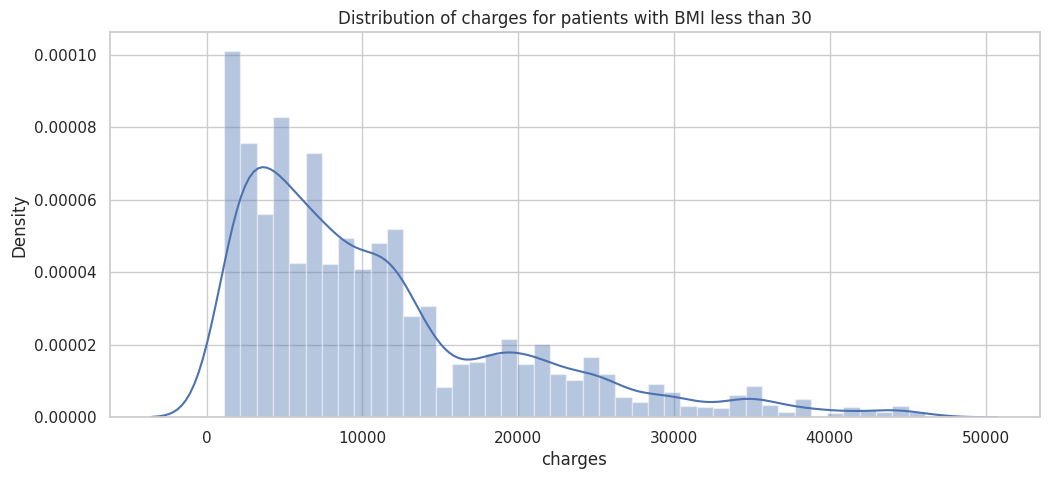

In [25]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

#### People with BMI above 30 spend more on treatment!

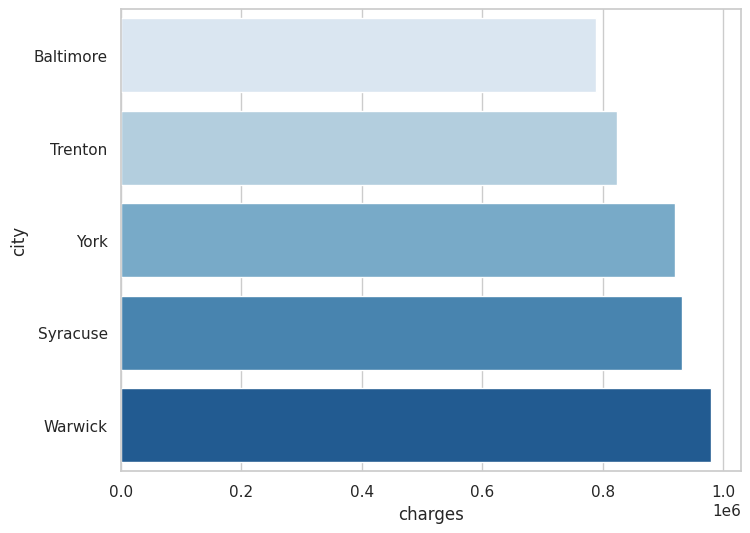

In [27]:
#Charges by city
charges = df['charges'].groupby(df['city']).sum().sort_values(ascending=True)

# Use barplot correctly with y and x arguments
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')

plt.show()

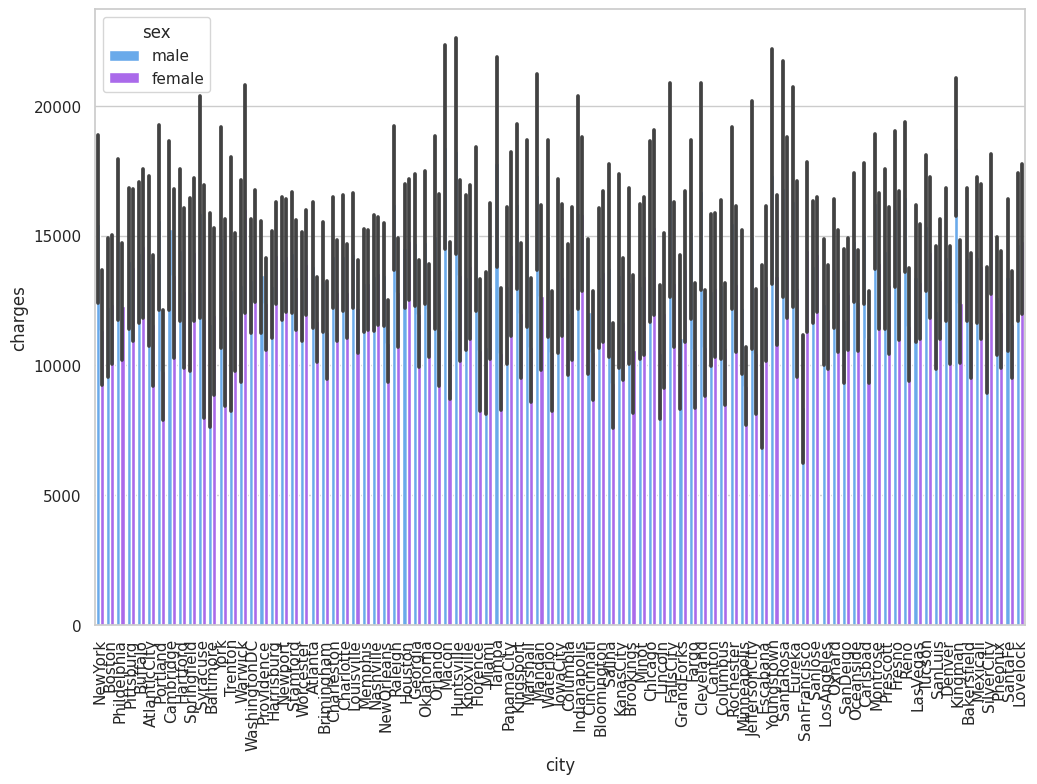

In [28]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='city', y='charges', hue='sex', data=df, palette='cool')
for item in ax.get_xticklabels():
    item.set_rotation(90)

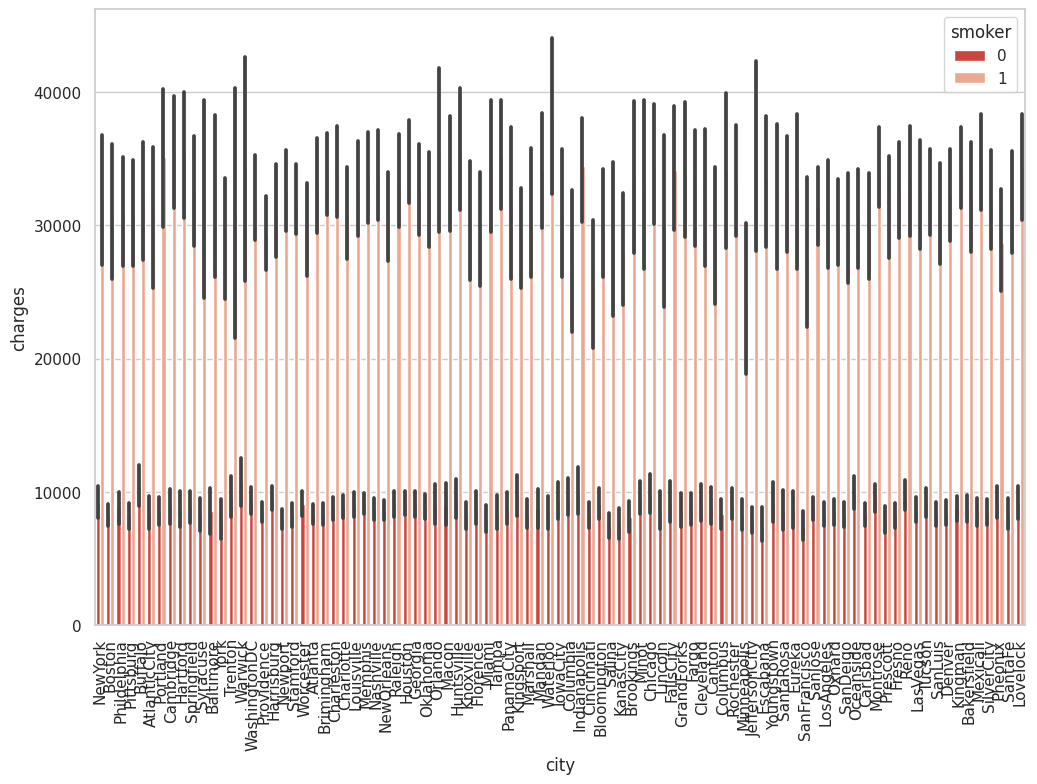

In [29]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'city', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')
for item in ax.get_xticklabels():
    item.set_rotation(90)

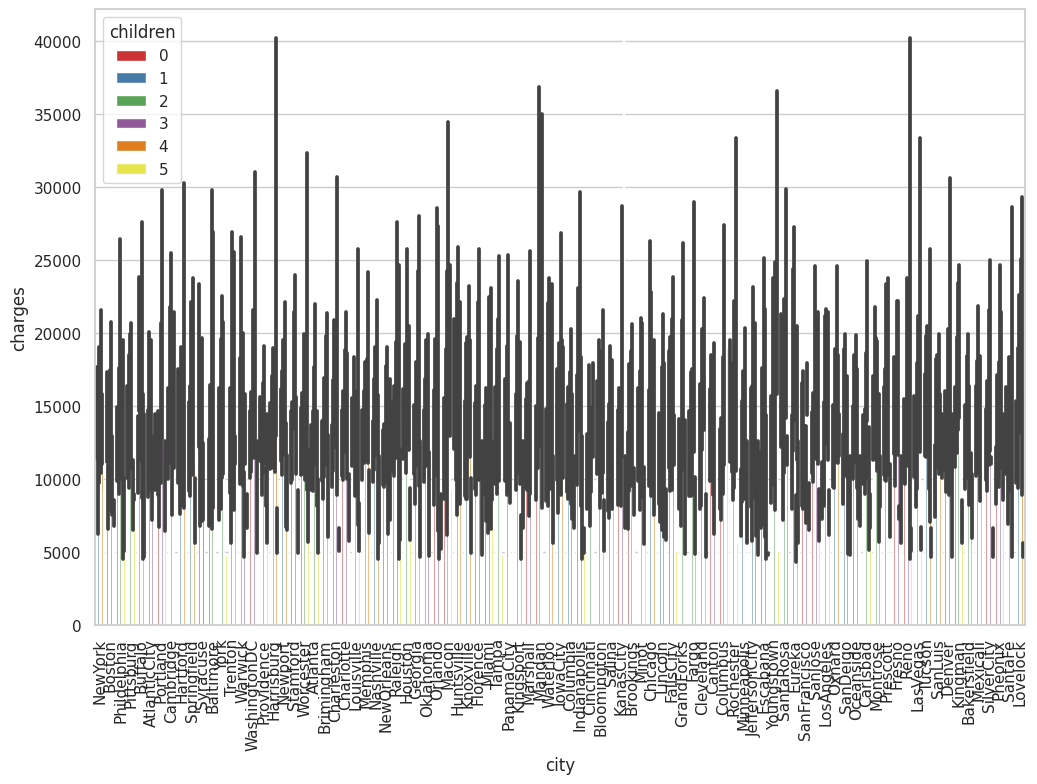

In [30]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='city', y='charges', hue='children', data=df, palette='Set1')
for item in ax.get_xticklabels():
    item.set_rotation(90)

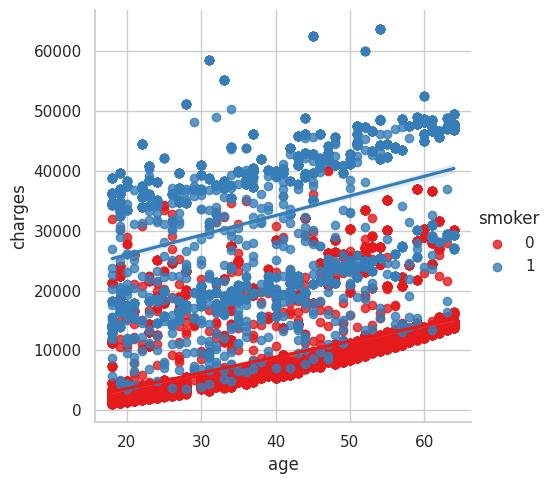

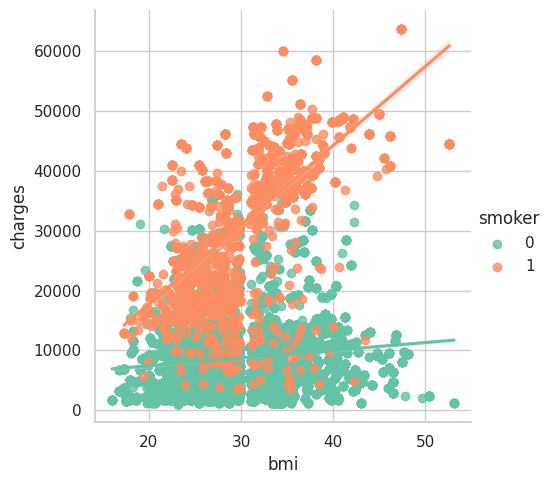

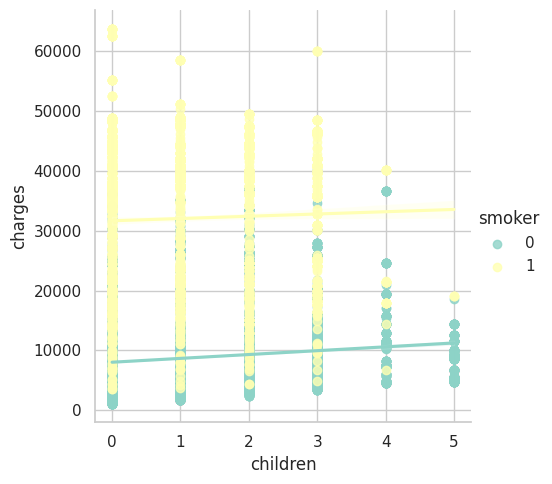

In [31]:
# Analyzing the medical charges by age, bmi and children according to the smoking factor
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

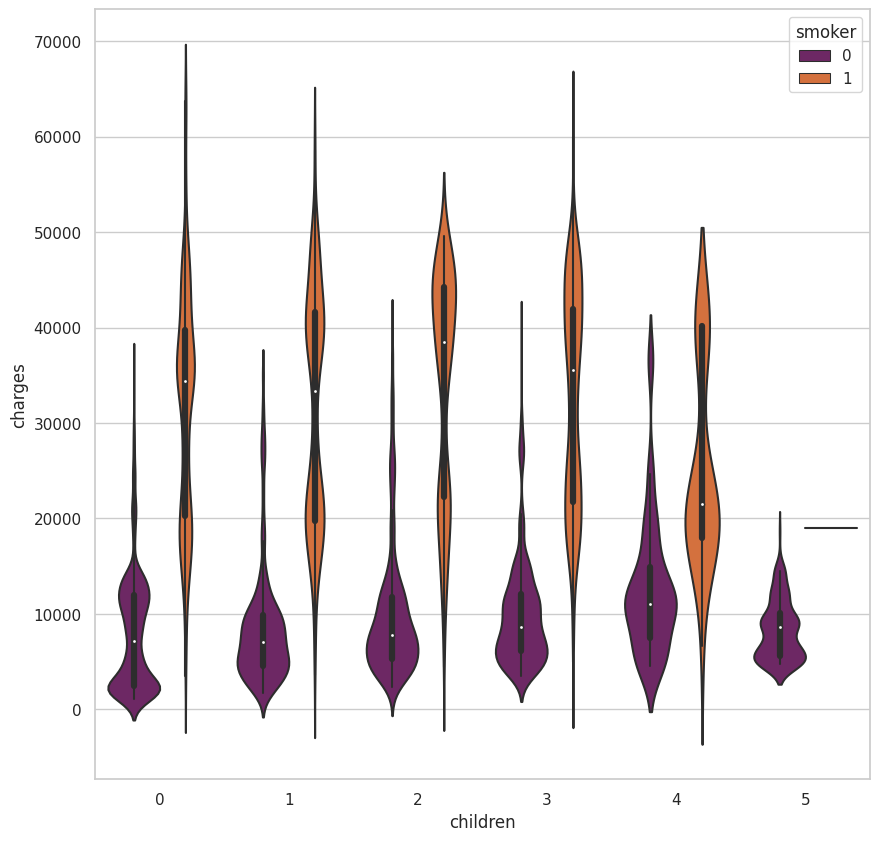

In [32]:
#Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children.
#Also people who have children generally smoke less, which the following violinplots shows too

f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

### Detect the outliers in our dataset

In [33]:
df

,age,sex,weight,bmi,hereditary_diseases,children,smoker,city,bloodpressure,diabetes,regular_ex,job_title,charges
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,38.0,female,71,27.3,NoDisease,1,0,Knoxville,0,1,0,Chef,6555.1
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


In [34]:
# Find the 99th percentile of charge column
charge_value=np.quantile(df["charges"], 0.99)
charge_value

48226.846999999965

In [35]:
# Selecting all the rows from the dataset whose charge value is greater than 48226.846999999965 in order to detect the outliers
df[df["charges"]>48226.846999999965]

,age,sex,weight,bmi,hereditary_diseases,children,smoker,city,bloodpressure,diabetes,regular_ex,job_title,charges
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
522,61.0,female,53,36.4,NoDisease,1,1,Nashville,72,1,0,Chef,48517.6
670,54.0,male,62,40.6,NoDisease,3,1,Providence,76,1,0,Accountant,48549.2
753,28.0,male,84,36.4,NoDisease,1,1,Cambridge,78,1,0,Engineer,51194.6
771,54.0,male,62,40.6,NoDisease,3,1,Florence,76,1,0,Accountant,48549.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14230,60.0,male,76,40.9,Cancer,0,1,Rochester,74,1,0,CA,48673.6
14463,31.0,female,65,38.1,NoDisease,1,1,FallsCity,80,1,0,Technician,58571.1
14520,63.0,female,70,37.7,Cancer,0,1,Oceanside,72,1,0,Buisnessman,48824.5
14688,60.0,male,76,40.9,Cancer,0,1,WashingtonDC,74,1,0,CA,48673.6


### Remove outliers in the dataset

In [36]:
df_filtered = df[df["charges"]<48226.846999999965]
df = df_filtered
df

,age,sex,weight,bmi,hereditary_diseases,children,smoker,city,bloodpressure,diabetes,regular_ex,job_title,charges
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
5,42.0,female,89,37.9,NoDisease,0,0,AtlanticCity,78,0,0,Dancer,6474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,38.0,female,71,27.3,NoDisease,1,0,Knoxville,0,1,0,Chef,6555.1
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


### Converting objects labels into categorical

In [37]:
df[['sex', 'smoker', 'city', 'hereditary_diseases', 'job_title']] = df[['sex', 'smoker', 'city', 'hereditary_diseases', 'job_title']].astype('category')
df.dtypes

<ipython-input-37-fbf41b45c569>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['sex', 'smoker', 'city', 'hereditary_diseases', 'job_title']] = df[['sex', 'smoker', 'city', 'hereditary_diseases', 'job_title']].astype('category')


age                     float64
sex                    category
weight                    int64
bmi                     float64
hereditary_diseases    category
children                  int64
smoker                 category
city                   category
bloodpressure             int64
diabetes                  int64
regular_ex                int64
job_title              category
charges                 float64
dtype: object

### Converting category labels into numerical using LabelEncoder

In [38]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.city.drop_duplicates())
df.city = label.transform(df.city)
label.fit(df.hereditary_diseases.drop_duplicates())
df.hereditary_diseases = label.transform(df.hereditary_diseases)
label.fit(df.job_title.drop_duplicates())
df.job_title = label.transform(df.job_title)
df.dtypes

<ipython-input-38-fe8d7d31c992>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex = label.transform(df.sex)
<ipython-input-38-fe8d7d31c992>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.smoker = label.transform(df.smoker)
<ipython-input-38-fe8d7d31c992>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

age                    float64
sex                      int64
weight                   int64
bmi                    float64
hereditary_diseases      int64
children                 int64
smoker                   int64
city                     int64
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title                int64
charges                float64
dtype: object

## Find the correlation between variables

In [39]:
correlation=df.corr()
correlation

,age,sex,weight,bmi,hereditary_diseases,children,smoker,city,bloodpressure,diabetes,regular_ex,job_title,charges
age,1.000000,0.004450,0.284399,0.175453,0.055362,0.056112,-0.040382,-0.002160,-0.011169,0.066977,0.010510,-0.118668,0.292339
sex,0.004450,1.000000,0.156161,0.075416,-0.039348,0.039366,0.069980,-0.008336,-0.025703,-0.012498,0.017228,0.003082,0.053594
weight,0.284399,0.156161,1.000000,0.249900,0.013454,0.131923,0.012828,0.009987,-0.024871,-0.013288,-0.002449,-0.071025,0.074348
bmi,0.175453,0.075416,0.249900,1.000000,-0.077946,0.051870,-0.010861,0.005194,-0.045428,0.073741,-0.035404,-0.011852,0.165381
hereditary_diseases,0.055362,-0.039348,0.013454,-0.077946,1.000000,0.011608,-0.381842,-0.005448,-0.041401,-0.070938,0.010130,0.012176,-0.446692
children,0.056112,0.039366,0.131923,0.051870,0.011608,1.000000,0.012973,-0.000906,0.017767,0.067837,-0.014431,-0.035505,0.078759
smoker,-0.040382,0.069980,0.012828,-0.010861,-0.381842,0.012973,1.000000,0.019312,-0.000088,0.050988,-0.024523,-0.020761,0.761854
city,-0.002160,-0.008336,0.009987,0.005194,-0.005448,-0.000906,0.019312,1.000000,0.018194,-0.004192,-0.001357,0.002326,0.010781
bloodpressure,-0.011169,-0.025703,-0.024871,-0.045428,-0.041401,0.017767,-0.000088,0.018194,1.000000,-0.014006,0.043942,0.015032,0.005818
diabetes,0.066977,-0.012498,-0.013288,0.073741,-0.070938,0.067837,0.050988,-0.004192,-0.014006,1.000000,0.007596,0.018909,0.131033


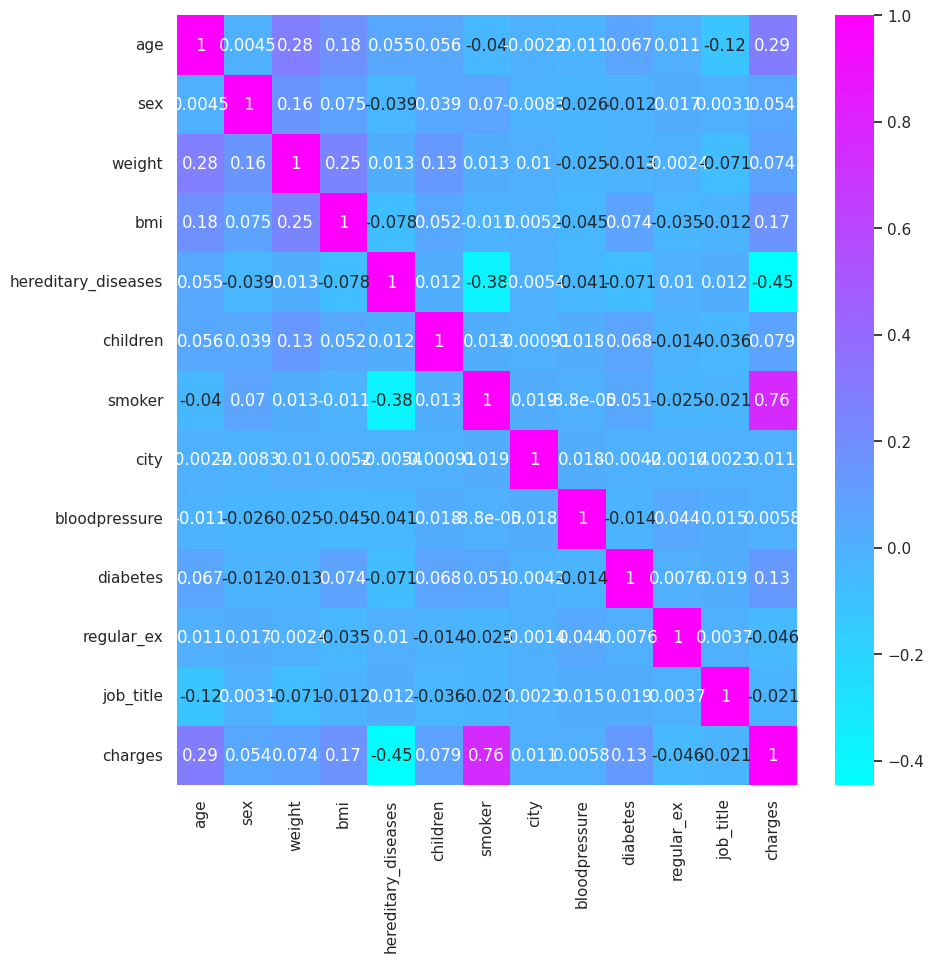

In [40]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

### Handle null values in the data

In [41]:
from sklearn.model_selection import train_test_split as holdout
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x = x.fillna(x.mean())
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

In [43]:
from sklearn.ensemble import RandomForestRegressor as rfr
Rfr = rfr(n_estimators = 100, criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)


## Feature importance ranking

In [44]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'weight', 'bmi', 'hereditary_diseases', 'children','smoker', 'city', 'bloodpressure', 'diabetes', 'regular_ex', 'job_title']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))


Feature importance ranking


1.smoker(0.582238)
2.age(0.127160)
3.bmi(0.119896)
4.hereditary_diseases(0.031944)
5.job_title(0.030755)
6.weight(0.030183)
7.bloodpressure(0.024724)
8.diabetes(0.023844)
9.children(0.016190)
10.regular_ex(0.005814)
11.sex(0.003869)
12.city(0.003383)


<BarContainer object of 12 artists>

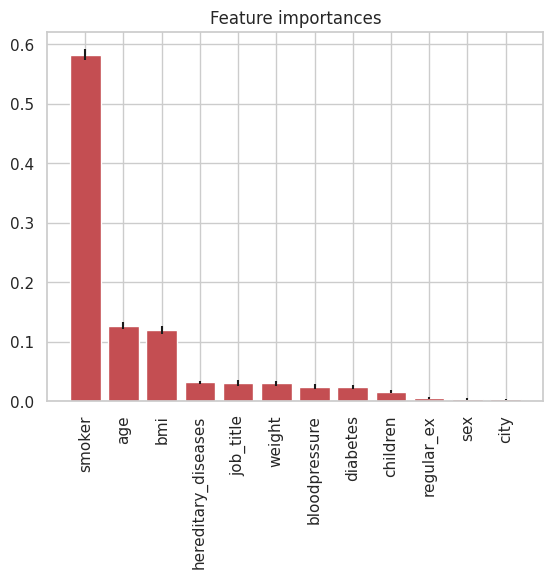

In [45]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.xticks(rotation=90)
plt.bar(importance_list, importances[indices],
       color="r", yerr=std[indices], align="center")


## Model Building

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [48]:
from sklearn.model_selection import train_test_split as holdout
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x = x.fillna(x.mean())
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

In [49]:
# Training models using k-fold cross-validation and seeing the performance of all the models in the given dataset.
# The below functions are used to train models of the data created and it returns the score for the model based on the predictions compared with the actual predictions.

n_folds = 10
def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    mae= cross_val_score(model, x_train, y_train, scoring="neg_mean_absolute_error", cv=kf)
    return(mae)

def mae(y_train, y_pred):
    return (mean_absolute_error(y_train, y_pred))


def mse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    mse= (-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(mse)

def mse(y_train, y_pred):
    return (mean_squared_error(y_train, y_pred))


def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmse(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

### Baseline - Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()

In [51]:
scores ={}
scores1 ={}
scores2 ={}

In [52]:
score = mae_cv(linearReg)
print("Linear:: Mean Absolute Error")
print("----------------------------")
print("Cross Validation: ",score.mean(), " Std:", score.std())
scores['linearReg'] = (score.mean(), score.std())
linear_model = linearReg.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_train)
print("MAE: ", mae(y_train,y_pred_linear))
print("")

score1 = mse_cv(linearReg)
print("Linear:: Mean Squared Error")
print("----------------------------")
print("Cross Validation: ",score1.mean(), " Std:", score1.std())
scores1['linearReg'] = (score1.mean(), score1.std())
print("MSE: ", mse(y_train,y_pred_linear))
print("")

score2 = rmse_cv(linearReg)
print("Linear:: Root Mean Squared Error")
print("----------------------------")
print("Cross Validation: ",score2.mean(), " Std:", score2.std())
scores2['linearReg'] = (score2.mean(), score2.std())
print("RMSE: ", rmse(y_train,y_pred_linear))

Linear:: Mean Absolute Error
----------------------------
Cross Validation:  -3985.369707314335  Std: 131.38434634007
MAE:  3978.6841088063843

Linear:: Mean Squared Error
----------------------------
Cross Validation:  35535358.994822934  Std: 2519849.7823100826
MSE:  35412629.305065736

Linear:: Root Mean Squared Error
----------------------------
Cross Validation:  5957.387276976305  Std: 211.88635384042215
RMSE:  5950.851141228936


## Other Models

In [53]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

### Lasso Regression

In [54]:
lasso = Lasso(alpha =0.0005, random_state=0)

In [55]:
# Using Lasso to add the penalty equivalent to the absolute value of the sum of coefficients. This penalty is added to the
# least square loss function and replaces the squared sum of coefficients from Ridge
score = mae_cv(lasso)
print("Lasso:: Mean Absolute Error")
print("----------------------------")
print("Cross Validation: ",score.mean(), " Std:", score.std())
scores['lasso'] = (score.mean(), score.std())
lasso_model = lasso.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_train)
print("MAE: ", mae(y_train,y_pred_lasso))
print("")


score1 = mse_cv(lasso)
print("Lasso:: Mean Squared Error")
print("----------------------------")
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['lasso'] = (score1.mean(), score1.std())
print("MSE: ", mse(y_train,y_pred_lasso))
print("")

score2 = rmse_cv(lasso)
print("Lasso:: Root Mean Squared Error")
print("----------------------------")
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['lasso'] = (score2.mean(), score2.std())
print("RMSE: ", rmse(y_train,y_pred_lasso))
print("")

Lasso:: Mean Absolute Error
----------------------------
Cross Validation:  -3985.369741327874  Std: 131.3843446507775
MAE:  3978.684144142119

Lasso:: Mean Squared Error
----------------------------
Cross Validation: 35535358.82840029  Std: 2519849.4645881727
MSE:  35412629.305071235

Lasso:: Root Mean Squared Error
----------------------------
Cross Validation: 5957.387263953509  Std: 211.88632727198285
RMSE:  5950.851141229398



### Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha =0.0005, random_state=0)

In [57]:
score = mae_cv(ridge)
print("Ridge:: Mean Absolute Error")
print("----------------------------")
print("Cross Validation: ",score.mean(), " Std:", score.std())
scores['ridge'] = (score.mean(), score.std())
ridge_model = ridge.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_train)
print("MAE: ", mae(y_train,y_pred_ridge))
print("")


score1 = mse_cv(ridge)
print("Ridge:: Mean Squared Error")
print("----------------------------")
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['ridge'] = (score1.mean(), score1.std())
print("MSE: ", mse(y_train,y_pred_ridge))
print("")

score2 = rmse_cv(ridge)
print("Ridge:: Root Mean Squared Error")
print("----------------------------")
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['ridge'] = (score2.mean(), score2.std())
print("RMSE: ", rmse(y_train,y_pred_ridge))
print("")

Ridge:: Mean Absolute Error
----------------------------
Cross Validation:  -3985.3701906441956  Std: 131.38433292011763
MAE:  3978.684542158579

Ridge:: Mean Squared Error
----------------------------
Cross Validation: 35535358.977169745  Std: 2519849.202888729
MSE:  35412629.30507229

Ridge:: Root Mean Squared Error
----------------------------
Cross Validation: 5957.3872771574  Std: 211.88630709154847
RMSE:  5950.851141229487



### Elastic Net Regression

In [58]:
elasticNet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=0)

In [59]:
# Elastic Net is the combination of both Ridge and Lasso. It adds both the sum of squared coefficients
# and the absolute sum of the coefficients with the ordinary least square function
score = mae_cv(elasticNet)
print("ElasticNet:: Mean Absolute Error")
print("----------------------------")
print("Cross Validation: ",score.mean(), " Std:", score.std())
scores['elasticNet'] = (score.mean(), score.std())
elasticNet_model = elasticNet.fit(x_train, y_train)
y_pred_elasticNet = elasticNet_model.predict(x_train)
print("MAE: ", mae(y_train,y_pred_elasticNet))
print("")

print("ElasticNet:: Mean Square Error::")
print("----------------------------")
score1 = mse_cv(elasticNet)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['elasticNet'] = (score1.mean(), score1.std())
print("MSE: ", mse(y_train,y_pred_elasticNet))
print("")

print("ElasticNet::Root Mean Square Error::")
print("----------------------------")
score2 = rmse_cv(elasticNet)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['elasticNet'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y_train,y_pred_elasticNet))
print("")

ElasticNet:: Mean Absolute Error
----------------------------
Cross Validation:  -3985.848597951465  Std: 131.37104763164461
MAE:  3979.1611245582408

ElasticNet:: Mean Square Error::
----------------------------
Cross Validation: 35535349.29086135  Std: 2519276.270949236
MSE:  35412637.24922872

ElasticNet::Root Mean Square Error::
----------------------------
Cross Validation: 5957.388108884636  Std: 211.84005990675465
RMSE:  5950.851808710138



### Kernel Ridge Regression

In [60]:
kernelRidge = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [61]:
# Kernel ridge regression is a non-parametric form of ridge regression. The aim is to learn a function in the space induced by the respective kernel 𝑘
# by minimizing a squared loss with a squared norm regularization term.
print("KernelRidge:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(kernelRidge)
print("Cross Validation:",score.mean(), " Std:", score.std())
scores['kernelRidge'] = (score.mean(), score.std())
kernelRidge_model = kernelRidge.fit(x_train, y_train)
y_pred_kernelRidge = kernelRidge_model.predict(x_train)
print("MAE: ", mae(y_train,y_pred_kernelRidge))
print("")

print("KernelRidge:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(kernelRidge)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['kernelRidge'] = (score1.mean(), score1.std())
print("MSE: ", mse(y_train,y_pred_kernelRidge))
print("")

print("KernelRidge:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(kernelRidge)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['kernelRidge'] = (score2.mean(), score2.std())
print("RMSE: ", rmse(y_train,y_pred_kernelRidge))
print("")

KernelRidge:: Mean Absolute Error
----------------------------
Cross Validation: -3160.306938366773  Std: 117.64430748654635
MAE:  3128.314222636945

KernelRidge:: Mean Square Error
----------------------------
Cross Validation: 25575183.104827292  Std: 2267135.5497186733
MSE:  25087082.023388356

KernelRidge:: Root Mean Square Error
----------------------------
Cross Validation: 5052.250033120996  Std: 223.5010238370139
RMSE:  5008.700632238701



### Support Vector Regression

In [62]:
svr = SVR(C= 20, epsilon= 0.008, gamma=0.0003)

In [63]:
print("SVR:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(svr)
print("Cross Validation:",score.mean(), " Std:", score.std())
scores['svr'] = (score.mean(), score.std())
svr_model = svr.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_train)
print("MAE: ", mae(y_train,y_pred_svr))
print("")

print("SVR:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(svr)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['svr'] = (score1.mean(), score1.std())
print("MSE: ",mse(y_train,y_pred_svr))
print("")

print("SVR:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(svr)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['svr'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y_train,y_pred_svr))
print("")

SVR:: Mean Absolute Error
----------------------------
Cross Validation: -6660.914345619417  Std: 224.86094748273104
MAE:  6632.74899533384

SVR:: Mean Square Error
----------------------------
Cross Validation: 152567714.4578527  Std: 7586320.935377191
MSE:  152606422.49297115

SVR:: Root Mean Square Error
----------------------------
Cross Validation: 12347.985592645171  Std: 308.165964506127
RMSE:  12353.3972045333



###  Gradient Boosting Regressor

In [64]:
gradientBoosting = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =0)

In [65]:
print("GradientBoostingRegressor:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(gradientBoosting)
print("Cross Validation::",score.mean(), " Std:", score.std())
scores['gradientBoosting'] = (score.mean(), score.std())
gradientBoosting_model = gradientBoosting.fit(x_train, y_train)
y_pred_gradientBoosting = gradientBoosting_model.predict(x_train)
print("MAE: ",mae(y_train,y_pred_gradientBoosting))
print("")

print("GradientBoostingRegressor:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(gradientBoosting)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['gradientBoosting'] = (score1.mean(), score1.std())
print("MSE: ",mse(y_train,y_pred_gradientBoosting))
print("")

print("GradientBoostingRegressor:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(gradientBoosting)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['gradientBoosting'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y_train,y_pred_gradientBoosting))
print("")

GradientBoostingRegressor:: Mean Absolute Error
----------------------------
Cross Validation:: -1238.4883624913896  Std: 109.7432510540974
MAE:  1006.9088750943258

GradientBoostingRegressor:: Mean Square Error
----------------------------
Cross Validation: 11054320.058205243  Std: 1754899.4230823817
MSE:  8498832.6917563

GradientBoostingRegressor:: Root Mean Square Error
----------------------------
Cross Validation: 3314.8703136196973  Std: 256.81678700601094
RMSE:  2915.2757488368575



### XG Boost Regressor

In [66]:
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =0, nthread = -1)

In [67]:
print("XGBRegressor:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(xgb)
print("Cross Validation::",score.mean(), " Std:", score.std())
scores['xgb'] = (score.mean(), score.std())
xgb_model = xgb.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_train)
print("MAE: ",mae(y_train,y_pred_xgb))
print("")

print("XGBRegressor:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(xgb)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['xgb'] = (score1.mean(), score1.std())
print("MSE: ",mse(y_train,y_pred_xgb))
print("")

print("XGBRegressor:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(xgb)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['xgb'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y_train,y_pred_xgb))
print("")

XGBRegressor:: Mean Absolute Error
----------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarn

Cross Validation:: -1881.8825857239797  Std: 89.53892095141649


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


MAE:  1609.834242216801

XGBRegressor:: Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarn

Cross Validation: 10141589.284844486  Std: 1137357.0286658367
MSE:  7009096.439614767

XGBRegressor:: Root Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarn

Cross Validation: 3179.7223287044408  Std: 175.9408911620539
RMSE:  2647.469818452095



### LGBM Regressor

In [68]:
lgbm = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11, random_state=0)

In [69]:
print("LGBMRegressor:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(lgbm)
print("Cross Validation:",score.mean(), " Std:", score.std())
scores['lgbm'] = (score.mean(), score.std())
lgbm_model = lgbm.fit(x_train, y_train)
y_pred_lgbm = lgbm_model.predict(x_train)
print("MAE: ",mae(y_train,y_pred_lgbm))
print("")

print("LGBMRegressor:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(lgbm)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['lgbm'] = (score1.mean(), score1.std())
print("MSE: ",mse(y_train,y_pred_lgbm))
print("")

print("LGBMRegressor:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(lgbm)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['lgbm'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y_train,y_pred_lgbm))
print("")

LGBMRegressor:: Mean Absolute Error
----------------------------
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 wil

### RandomForestRegressor

In [70]:
randomForest = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=0)

In [71]:
print("RandomForestRegressor:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(randomForest)
print("Cross Validation:",score.mean(), " Std:", score.std())
scores['randomForest'] = (score.mean(), score.std())
randomForest_model = randomForest.fit(x_train, y_train)
y_pred_randomForest = randomForest_model.predict(x_train)
print("MAE: ",mae(y_train,y_pred_randomForest))
print("")

print("RandomForestRegressor:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(randomForest)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['randomForest'] = (score1.mean(), score1.std())
print("MSE: ",mse(y_train,y_pred_randomForest))
print("")

print("RandomForestRegressor:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(randomForest)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['randomForest'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y_train,y_pred_randomForest))
print("")

RandomForestRegressor:: Mean Absolute Error
----------------------------
Cross Validation: -944.7975021929221  Std: 70.88425407213629
MAE:  646.5523523635144

RandomForestRegressor:: Mean Square Error
----------------------------
Cross Validation: 6660086.480448803  Std: 884510.4226536357
MSE:  3422434.6055696816

RandomForestRegressor:: Root Mean Square Error
----------------------------
Cross Validation: 2574.7610864680914  Std: 175.1908332603453
RMSE:  1849.982325745217



### K-Means

In [72]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state=16)

In [73]:
print("KMeans:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(kmeans)
print("Cross Validation:",score.mean(), " Std:", score.std())
scores['kmeans'] = (score.mean(), score.std())
kmeans_model = kmeans.fit(x_train, y_train)
y_pred_kmeans = kmeans_model.predict(x_train)
print("MAE: ",mae(y_train,y_pred_kmeans))
print("")

print("KMeans:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(kmeans)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['kmeans'] = (score1.mean(), score1.std())
print("MSE: ",mse(y_train,y_pred_kmeans))
print("")

print("KMeans:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(kmeans)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['kmeans'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y_train,y_pred_kmeans))
print("")

KMeans:: Mean Absolute Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Cross Validation: -13056.650881965083  Std: 242.76104881850475


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MAE:  13056.70282444828

KMeans:: Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Cross Validation: 304368292.2058227  Std: 10797074.124668783
MSE:  304370511.32676774

KMeans:: Root Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Cross Validation: 17443.397619881056  Std: 310.1155922403309
RMSE:  17446.217679679678



### Naive Bayes - 4 variants
#### GaussianNB
#### MultinomialNB
#### BernoulliNB
#### CategoricalNB

In [78]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer

# Sample data
X = np.random.rand(100,5)
y = np.random.randn(100)

# Discretize y into 3 bins
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y = est.fit_transform(y.reshape(-1,1))

# Gaussian NB model
glaussian = GaussianNB()

def mae_cv(model):
    return cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')


In [82]:
print("GaussianNB:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(glaussian)
print("Cross Validation:",score.mean(), " Std:", score.std())
scores['glaussian'] = (score.mean(), score.std())
glaussian_model = glaussian.fit(X, y)
y_train=y_train.astype('int')
y_pred_glaussian = glaussian_model.predict(X)
print("MAE: ",mae(y,y_pred_glaussian))
print("")

print("GaussianNB:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(glaussian)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['glaussian'] = (score1.mean(), score1.std())
print("MSE: ",mse(y,y_pred_glaussian))
print("")

print("GaussianNB:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(glaussian)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['glaussian'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y,y_pred_glaussian))
print("")

GaussianNB:: Mean Absolute Error
----------------------------
Cross Validation: -0.5  Std: 0.15491933384829668
MAE:  0.45

GaussianNB:: Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pyth

Cross Validation: 12880018.45644448  Std: 1965690.0513859673
MSE:  0.53

GaussianNB:: Root Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross Validation: 3577.84816373817  Std: 281.10669447718016
RMSE:  0.7280109889280518



In [83]:
from sklearn.naive_bayes import MultinomialNB
multinomial = MultinomialNB()

In [84]:
print("MultinomialNB:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(multinomial)
print("Cross Validation:",score.mean(), " Std:", score.std())
scores['multinomial'] = (score.mean(), score.std())
y_train=y_train.astype('int')
multinomial_model = multinomial.fit(x_train, y_train)
y_pred_multinomial = multinomial_model.predict(x_train)
print("MAE: ",mae(y_train,y_pred_multinomial))
print("")

print("MultinomialNB:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(multinomial)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['multinomial'] = (score1.mean(), score1.std())
print("MSE: ",mse(y_train,y_pred_multinomial))
print("")

print("MultinomialNB:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(multinomial)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['multinomial'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y_train,y_pred_multinomial))
print("")

MultinomialNB:: Mean Absolute Error
----------------------------
Cross Validation: -0.48  Std: 0.039999999999999994


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pyth

MAE:  4369.338479702116

MultinomialNB:: Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross Validation: 94749258.28492428  Std: 5758665.836678343
MSE:  81490853.1521206

MultinomialNB:: Root Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross Validation: 9729.416213277258  Std: 296.17297942568143
RMSE:  9027.22843136921



In [85]:
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()

In [86]:
print("BernoulliNB:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(bernoulli)
print("Cross Validation:",score.mean(), " Std:", score.std())
scores['bernoulli'] = (score.mean(), score.std())
y_train=y_train.astype('int')
bernoulli_model = bernoulli.fit(x_train, y_train)
y_pred_bernoulli = bernoulli_model.predict(x_train)
print("MAE: ",mae(y_train,y_pred_bernoulli))
print("")

print("BernoulliNB:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(bernoulli)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['bernoulli'] = (score1.mean(), score1.std())
print("MSE: ",mse(y_train,y_pred_bernoulli))
print("")

print("BernoulliNB:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(bernoulli)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['bernoulli'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y_train,y_pred_bernoulli))
print("")

BernoulliNB:: Mean Absolute Error
----------------------------
Cross Validation: -0.48  Std: 0.039999999999999994


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pyth

MAE:  5987.737626010353

BernoulliNB:: Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross Validation: 78288742.72467984  Std: 2813766.2563401973
MSE:  75399164.2852602

BernoulliNB:: Root Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross Validation: 8846.663556895637  Std: 159.0177215735393
RMSE:  8683.269216444933



In [87]:
from sklearn.naive_bayes import CategoricalNB
categoricalNB = CategoricalNB()

In [88]:
print("CategoricalNB:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(categoricalNB)
print("Cross Validation:",score.mean(), " Std:", score.std())
scores['categoricalNB'] = (score.mean(), score.std())
y_train=y_train.astype('int')
categoricalNB_model = categoricalNB.fit(x_train, y_train)
y_pred_categoricalNB = categoricalNB_model.predict(x_train)
print("MAE: ",mae(y_train,y_pred_categoricalNB))
print("")

print("CategoricalNB:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(categoricalNB)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['categoricalNB'] = (score1.mean(), score1.std())
print("MSE: ",mse(y_train,y_pred_categoricalNB))
print("")

print("CategoricalNB:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(categoricalNB)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['categoricalNB'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y_train,y_pred_categoricalNB))
print("")

CategoricalNB:: Mean Absolute Error
----------------------------
Cross Validation: -0.48  Std: 0.039999999999999994


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pyth

MAE:  520.3821632912542

CategoricalNB:: Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross Validation: 12033638.359584507  Std: 1849595.663992547
MSE:  8942036.706929434

CategoricalNB:: Root Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross Validation: 3458.5025022460986  Std: 269.07025391518107
RMSE:  2990.3238464971373



### Stochastic Gradient Descent

In [89]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000, tol=1e-3)

In [90]:
print("SGDClassifier:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(sgd)
print("Cross Validation:",score.mean(), " Std:", score.std())
scores['sgd'] = (score.mean(), score.std())
y_train=y_train.astype('int')
sgd_model = sgd.fit(x_train, y_train)
y_pred_sgd = sgd_model.predict(x_train)
print("MAE: ",mae(y_train,y_pred_sgd))
print("")

print("SGDClassifier:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(sgd)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['sgd'] = (score1.mean(), score1.std())
print("MSE: ",mse(y_train,y_pred_sgd))
print("")

print("SGDClassifier:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(sgd)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['sgd'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y_train,y_pred_sgd))
print("")

SGDClassifier:: Mean Absolute Error
----------------------------
Cross Validation: -0.6300000000000001  Std: 0.19519221295943134


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pyth

MAE:  8751.379802016165

SGDClassifier:: Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross Validation: 213253428.32960984  Std: 46842882.89725268
MSE:  197746415.11243302

SGDClassifier:: Root Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross Validation: 14065.484095105941  Std: 2074.5155542247744
RMSE:  14062.233645919592



### Perceptron

In [91]:
from sklearn.linear_model import Perceptron
# this is same as SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
perceptron = Perceptron(tol=1e-3, random_state=0)

In [92]:
print("Perceptron:: Mean Absolute Error")
print("----------------------------")
score = mae_cv(perceptron)
print("Cross Validation:",score.mean(), " Std:", score.std())
scores['perceptron'] = (score.mean(), score.std())
y_train=y_train.astype('int')
perceptron_model = perceptron.fit(x_train, y_train)
y_pred_perceptron = perceptron_model.predict(x_train)
print("MAE: ",mae(y_train,y_pred_perceptron))
print("")

print("Perceptron:: Mean Square Error")
print("----------------------------")
score1 = mse_cv(perceptron)
print("Cross Validation:",score1.mean(), " Std:", score1.std())
scores1['perceptron'] = (score1.mean(), score1.std())
print("MSE: ",mse(y_train,y_pred_perceptron))
print("")

print("Perceptron:: Root Mean Square Error")
print("----------------------------")
score2 = rmse_cv(perceptron)
print("Cross Validation:",score2.mean(), " Std:", score2.std())
scores2['perceptron'] = (score2.mean(), score2.std())
print("RMSE: ",rmse(y_train,y_pred_perceptron))
print("")

Perceptron:: Mean Absolute Error
----------------------------
Cross Validation: -0.5599999999999999  Std: 0.13564659966250536


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pyth

MAE:  8446.483516483517

Perceptron:: Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross Validation: 241038400.94487643  Std: 137206662.67466632
MSE:  160761480.31659248

Perceptron:: Root Mean Square Error
----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross Validation: 15098.275305782174  Std: 3616.695139997935
RMSE:  12679.175064513956



### Ensemble Model

In [93]:
def ensemble_models(X):
    return ((0.1 * lasso_model.predict(X)) +
            (0.1 * elasticNet_model.predict(X)) +
           (0.1 * kernelRidge_model.predict(X)) +
           (0.4 * gradientBoosting_model.predict(X)) +
           (0.1 * xgb_model.predict(X)) +
           (0.2 * lgbm_model.predict(X)))

In [94]:
averaged_score = mae(y_train, ensemble_models(x_train))
scores['averaged'] = (averaged_score, 0)
print('MAE score on train data:', averaged_score)

averaged_score1 = mse(y_train, ensemble_models(x_train))
scores1['averaged'] = (averaged_score1, 0)
print('MSE score on train data:', averaged_score1)

averaged_score2 = rmse(y_train, ensemble_models(x_train))
scores2['averaged'] = (averaged_score2, 0)
print('RMSE score on train data:', averaged_score2)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
MAE score on train data: 2041.1151734845728
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current

## Model Performance

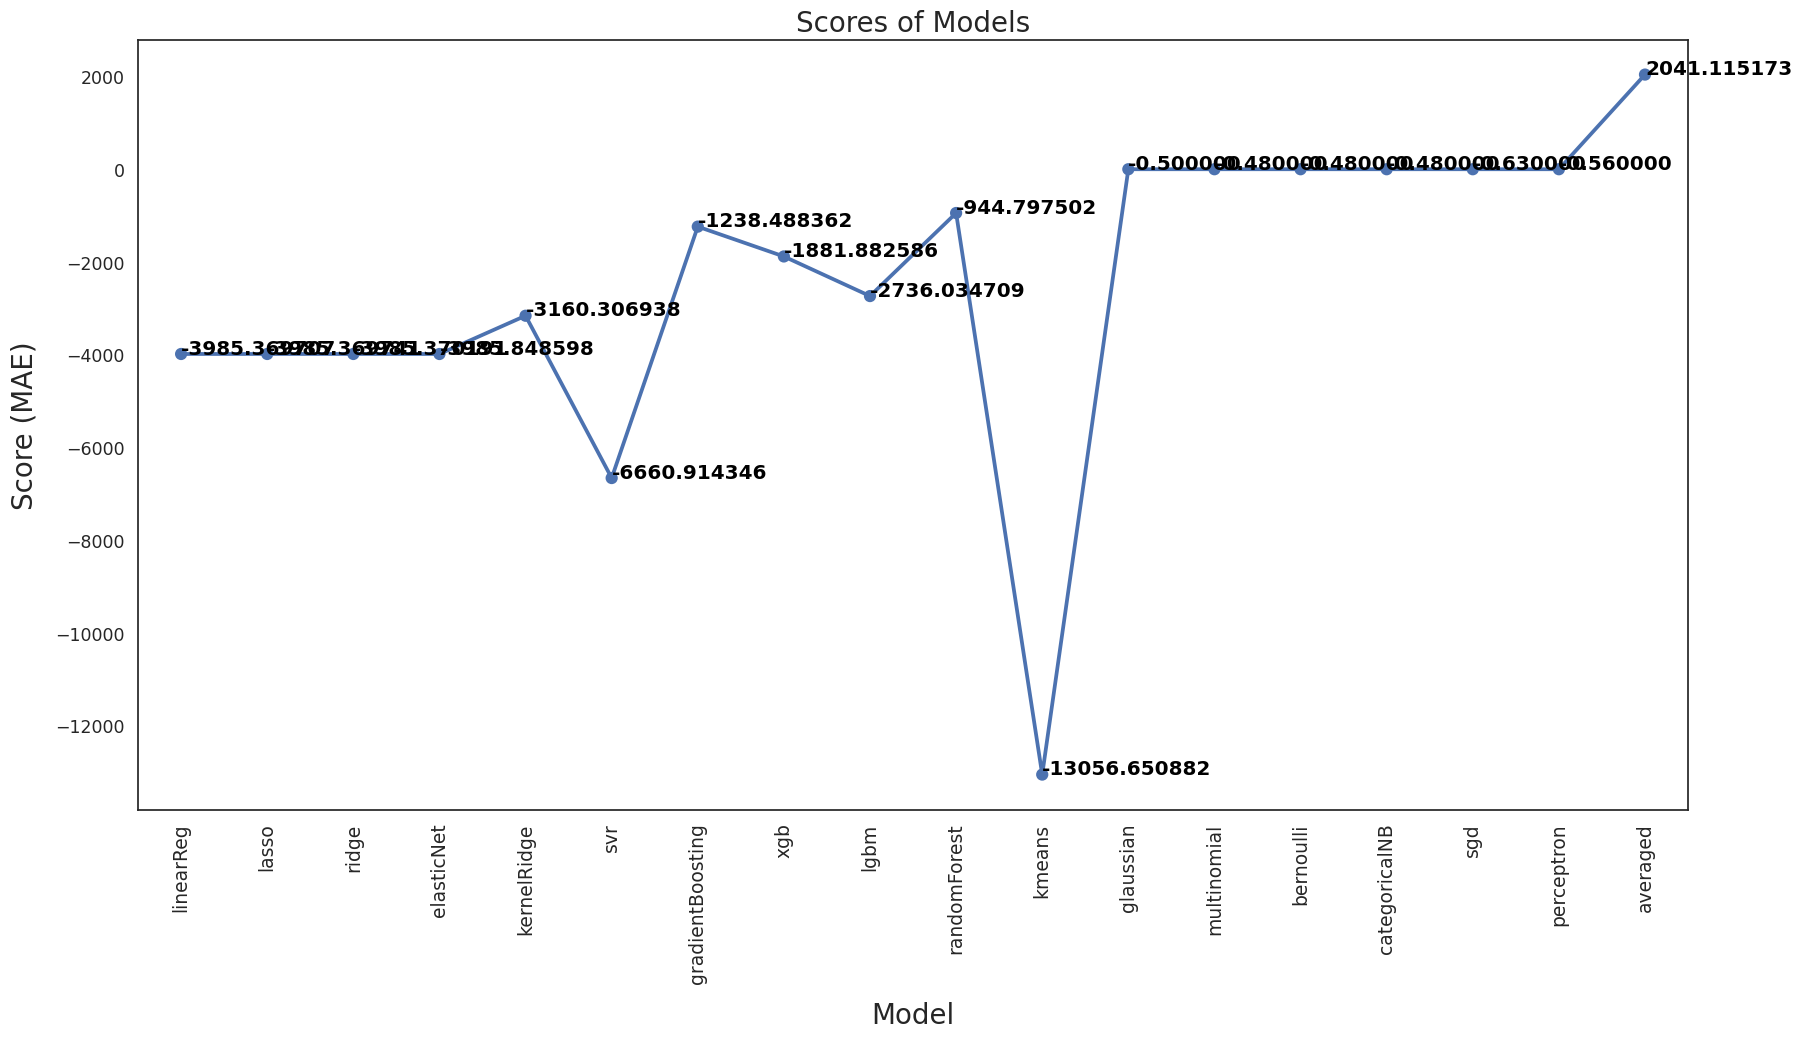

In [101]:
sns.set_style("white")
fig = plt.figure(figsize=(20, 10))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (MAE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)
plt.title('Scores of Models', size=20)
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()


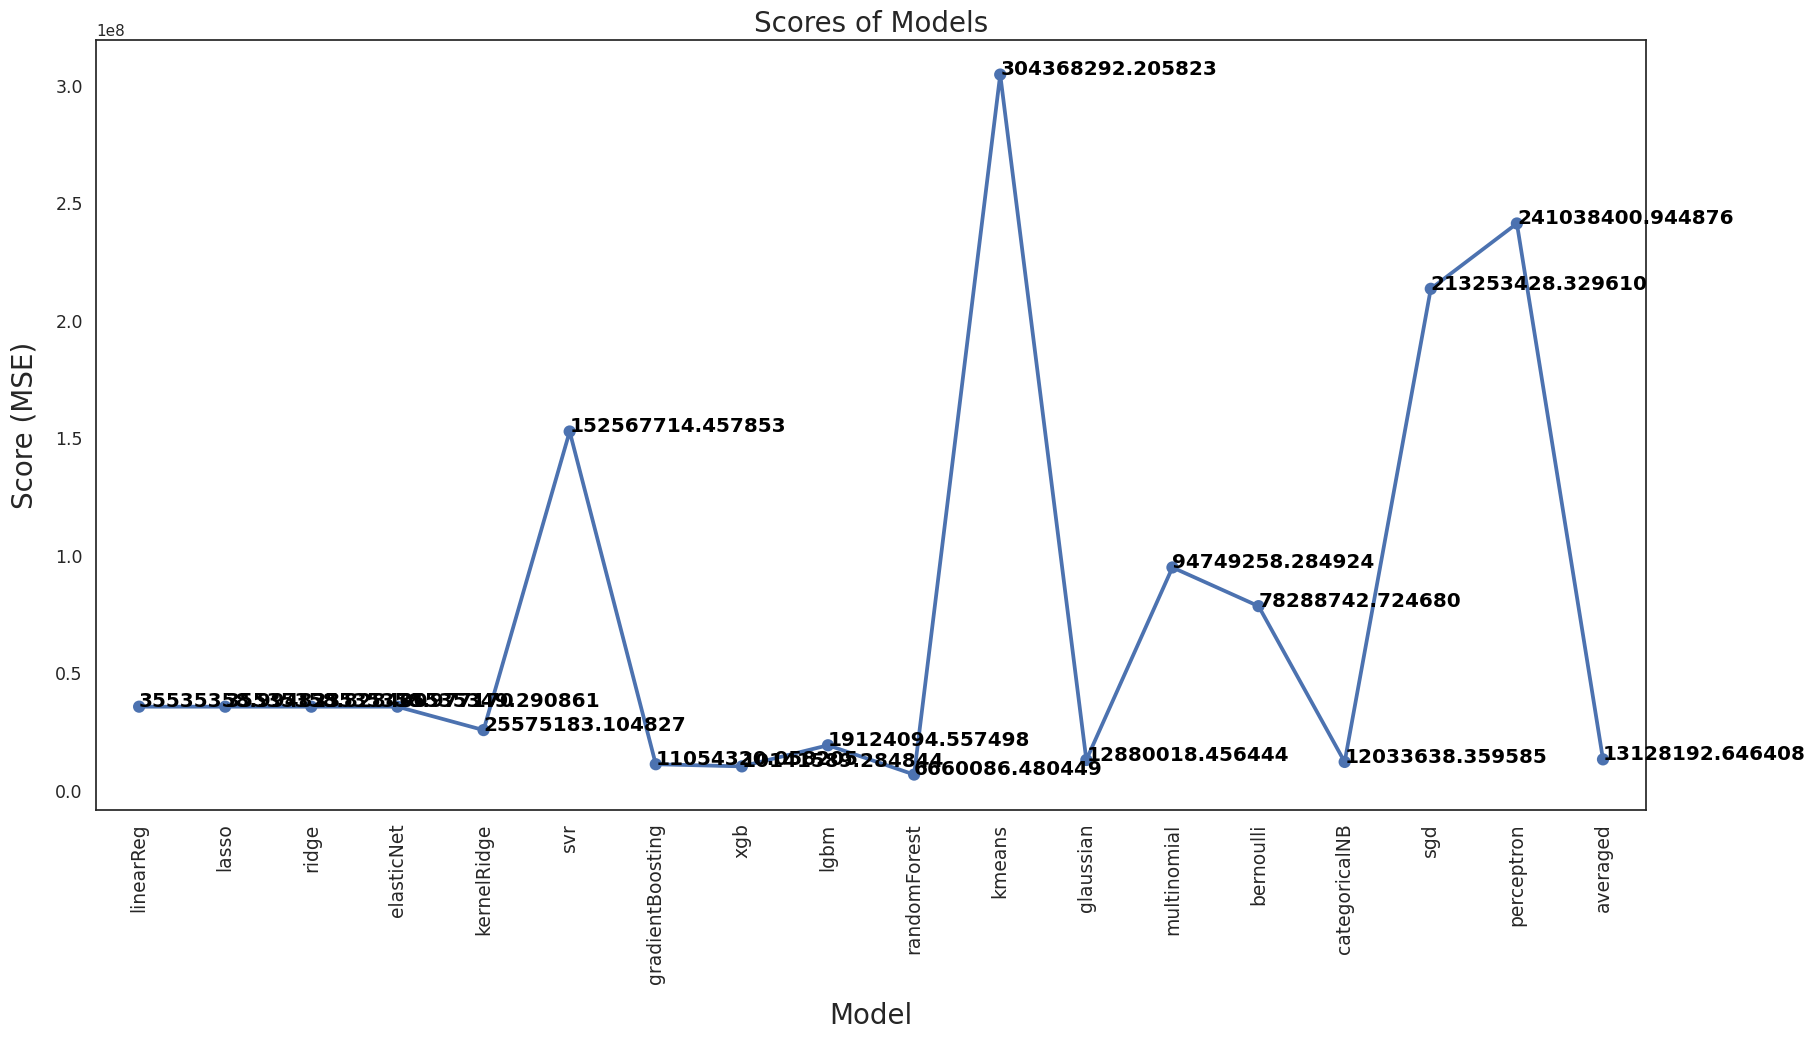

In [96]:
sns.set_style("white")
fig = plt.figure(figsize=(20, 10))

ax = sns.pointplot(x=list(scores1.keys()), y=[score1 for score1, _ in scores1.values()], markers=['o'], linestyles=['-'])
for i, score1 in enumerate(scores1.values()):
    ax.text(i, score1[0] + 0.002, '{:.6f}'.format(score1[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (MSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)
plt.title('Scores of Models', size=20)
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()


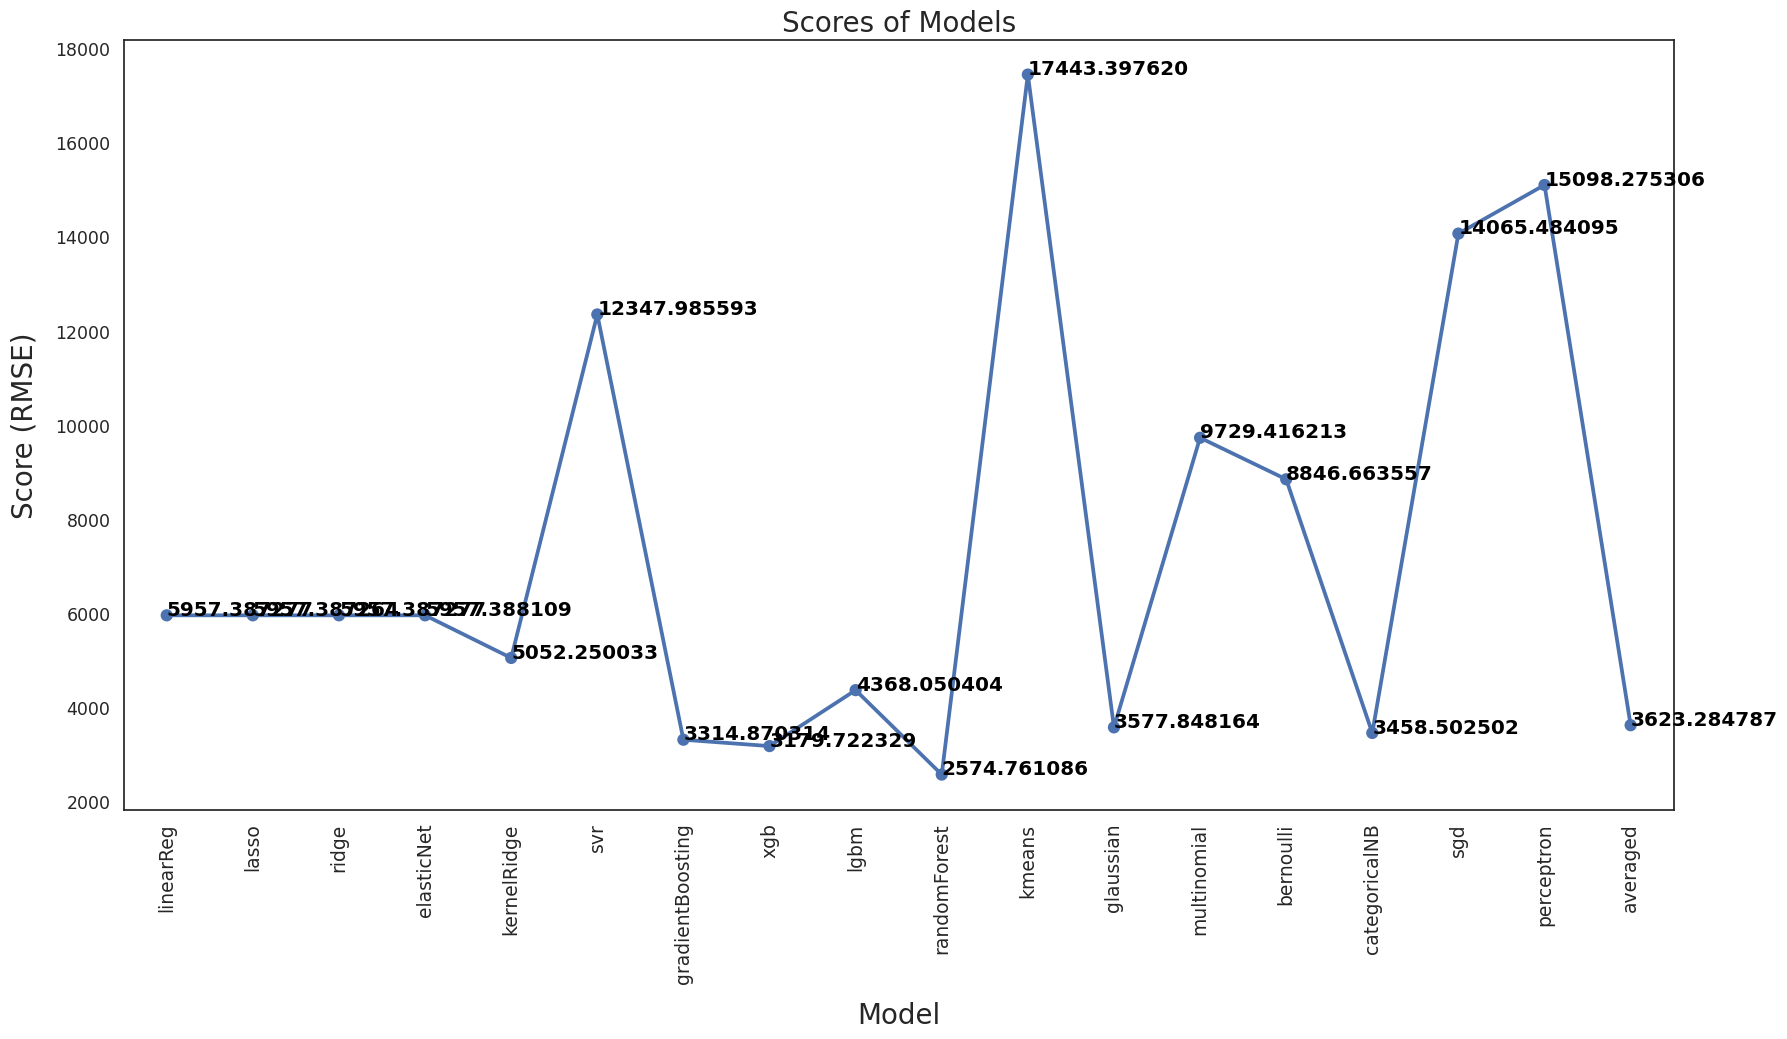

In [97]:
sns.set_style("white")
fig = plt.figure(figsize=(20, 10))

ax = sns.pointplot(x=list(scores2.keys()), y=[score2 for score2, _ in scores2.values()], markers=['o'], linestyles=['-'])
for i, score2 in enumerate(scores2.values()):
    ax.text(i, score2[0] + 0.002, '{:.6f}'.format(score2[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)
plt.title('Scores of Models', size=20)
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()